#### Author: Chenxi Wang

In [17]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt   # use matplotlib for plotting with inline plots
%matplotlib inline

import os
print os.getcwd()

/Users/sheilacwang/Documents/Study /17Fall/CS 273A/hw/hw3


# Problem 1: Logistic Regression

In [18]:
iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1] # get first two features & target
X,Y = ml.shuffleData(X,Y) # reorder randomly (important later)
X,_ = ml.transforms.rescale(X) # works much better on rescaled data

XA, YA = X[Y<2,:], Y[Y<2] # get class 0 vs 1
XB, YB = X[Y>0,:], Y[Y>0] # get class 1 vs 2

## Question 1: Scatterplot

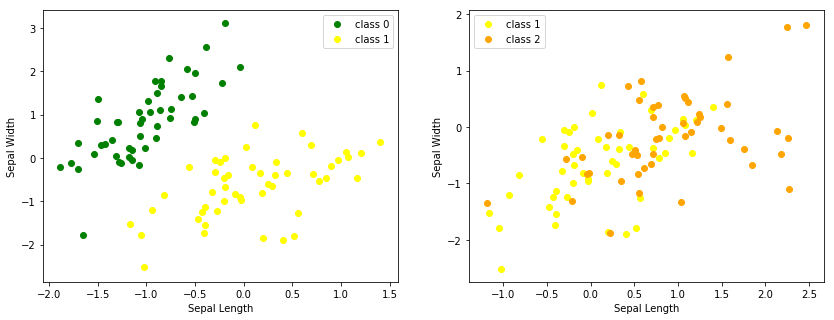

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax = ax.flatten()
crs = ['green', 'yellow', 'orange']
   
for c in np.unique(YA):
    ax[0].scatter(XA[YA==c, 0], XA[YA==c, 1],\
                  color = crs[int(c)],\
                  label='class %d' % (int(c)))
    ax[0].legend()
    ax[0].set_xlabel('Sepal Length')
    ax[0].set_ylabel('Sepal Width')
    
for c in np.unique(YB):
    ax[1].scatter(XB[YB==c, 0], XB[YB==c, 1],\
                  color = crs[int(c)],\
                  label='class %d' % (int(c)))
    ax[1].legend()
    ax[1].set_xlabel('Sepal Length')
    ax[1].set_ylabel('Sepal Width')

plt.show()    

As are suggested by the scatterplots, class 0 and class 1 are linearly separable according the first two features, while class 1 and 2 are not.

## Question 2

The lines of code I added to the function is: \
\newline
x2b = - (self.theta[0] + self.theta[1] * x1b)/self.theta[2]

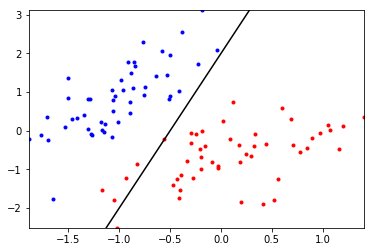

In [20]:
from logisticClassify2 import *

learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YA) # define class labels using YA or YB
wts = np.array([0.5,1.,-0.25]); # TODO: fill in values
learner.theta = wts; # set the learner's parameters
learner.plotBoundary(XA,YA)

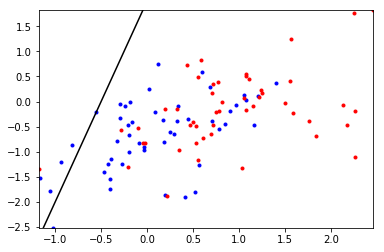

In [21]:
learner = logisticClassify2(); # create "blank" learner
learner.classes = np.unique(YB) # define class labels using YA or YB
wts = np.array([0.5,1.,-0.25]); # TODO: fill in values
learner.theta = wts; # set the learner's parameters
learner.plotBoundary(XB,YB)

## Question 3

The function definition is:

In [22]:
# def predict(self, X):
#     """ Return the predictied class of each data point in X"""
#     r = np.zeros(X.shape[0]);
#     Yhat = np.zeros(X.shape[0]);
#     for i in range(X.shape[0]):
#         r[i] = self.theta[0] + self.theta[1]*X[i,0]\
#                + self.theta[2]*X[i,1]
#         if r[i] > 0:
#             Yhat[i] = self.classes[1]
#         else:
#             Yhat[i] = self.classes[0]
       
#     return Yhat

In [23]:
wts = np.array([0.5,1.,-0.25])
learner = logisticClassify2()
learner.theta = wts; # set the learner's parameters
YA_hat = learner.predict(XA)
YB_hat = learner.predict(XB)

print "classifier error rate on dataset A:",learner.err(XA, YA) 
print
print "classifier error rate on dataset B:", learner.err(XB, YB-1) 
## Since YB initial class values are 1 and 2

classifier error rate on dataset A: 0.0505050505051

classifier error rate on dataset B: 0.464646464646


## Question 4

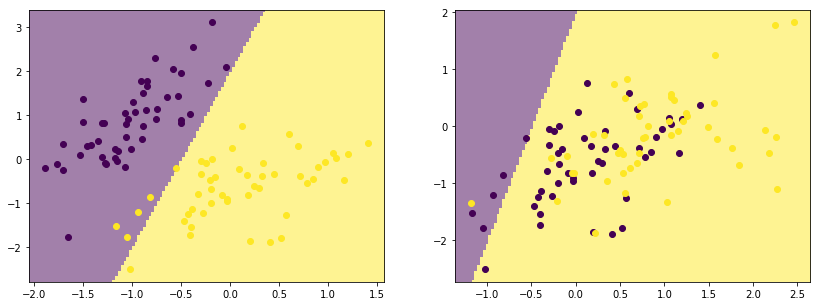

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5));
ax = ax.flatten();
Y = [YA, YB-1];

for i, X in enumerate([XA, XB]):
    ml.plotClassify2D( learner, X, Y[i], axis=ax[i] )

plt.show()

The decision boundaries matches the plots I computed analytically.

## Question 5

Since
$\sigma(r) = (1+exp(-r))^{-1},$ 
then
$\sigma(x^{(j)}\theta^T) = (1+exp(-x^{(j)}\theta^T))^{-1},$ 
and 
$J_j(\theta) = -y^{(j)} log(\sigma(x^{(j)}\theta^T)) - (1-y^{(j)}) log(1-\sigma(x^{(j)}\theta^T)).$ \
\newline

By taking partial derivatives, we have:

$$
\frac{\partial J^{(j)}}{\partial \theta_0} = (-\frac{y^{(j)}}{\sigma(x^{(j)}\theta^T)} + \frac{1-y^{(j)}}{1-\sigma(x^{(j)}\theta^T)}) \frac{exp(-x^{(j)}\theta^T)}{(1+exp(-x^{(j)}\theta^T))^2} = - y^{(j)} + \sigma(x^{(j)}\theta^T)
$$

$$
\frac{\partial J^{(j)}}{\partial \theta_1} = (-\frac{y^{(j)}}{\sigma(x^{(j)}\theta^T)} + \frac{1-^{(j)}y}{1-\sigma(x^{(j)}\theta^T)}) \frac{exp(-x^{(j)}\theta^T)}{(1+exp(-x^{(j)}\theta^T))^2}x_1 = (- y^{(j)} + \sigma(x^{(j)}\theta^T))x_1
$$

$$
\frac{\partial J^{(j)}}{\partial \theta_2} = (-\frac{y^{(j)}}{\sigma(x^{(j)}\theta^T)} + \frac{1-^{(j)}y}{1-\sigma(x^{(j)}\theta^T)}) \frac{exp(-x^{(j)}\theta^T)}{(1+exp(-x^{(j)}\theta^T))^2}x_2 = (- y^{(j)} + \sigma(x^{(j)}\theta^T))x_2
$$


## Question 6

The complete implementation of train is:


In [9]:
# def train(self, X, Y, initStep=0.2, stopTol=1e-4, \
#            stopEpochs=5000, plot=None):
#         """ Train the logistic regression using stochastic gradient descent """
#         M,N = X.shape;                    
#         self.classes = np.unique(Y);       
#         XX = np.hstack((np.ones((M,1)),X)) 
#         YY = ml.toIndex(Y,self.classes);  
#         if len(self.theta)!=N+1: 
#             self.theta=np.random.rand(N+1);
#         def sigma(r):
#             return 1/(1+np.exp(-r))
#         # init loop variables:
#         epoch=0; done=False; Jnll=[np.inf]; J01=[np.inf]; 
#         while not done:
#             stepsize, epoch = initStep*2.0/(2.0+epoch),\
#             epoch+1;
#             # Do an SGD pass through the entire data set:
#             for i in np.random.permutation(M):
#                 ri = np.dot(self.theta, XX[i,:]);
#                 # TODO: compute linear response r(x)
#                 gradi = (-YY[i] + sigma(ri))*XX[i,:];    
#                 # TODO: compute gradient of NLL loss
#                 self.theta -= stepsize * gradi;  
                          
#             J01.append( self.err(X,Y) ) 
             
#             ## TODO: compute surrogate loss
#             jsur = 0;
#             for i in np.random.permutation(M):
#                 jsur += -YY[i]*np.log(sigma(np.dot(self.theta, XX[i,:])))-\
#                 (1-YY[i])*np.log(1-sigma(np.dot(self.theta, XX[i,:])))
#             Jsur = jsur/M 
#             ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
#             Jnll.append( Jsur ) # TODO evaluate the current NLL loss
            
#             plt.figure(1); 
#             plt.plot(Jnll,'b-',J01,'r-');
#             plt.xlabel("epoch")
#             plt.title("Convergence of Surrogate Loss and Error Rate")
#             plt.draw();    # plot losses
#             if N==2: 
#                 plt.figure(2); 
#                 self.plotBoundary(X,Y);
#                 plt.title("Convergence of Classifier")
#                 plt.draw(); # & predictor if 2D
#             plt.pause(.01);                    

#             ## For debugging: 
#             ## print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
#             ## raw_input()   # pause for keystroke

#             # TODO check stopping criteria:
#             if epoch > stopEpochs or \
#             np.abs(Jnll[-2] - Jnll[-1]) < stopTol:
#                 done = True;  
#         plt.figure(3); 
#         self.plotBoundary(X,Y); 
#         plt.title("Final Converged Classifier")
#         plt.draw(); 

## Question 7

#### The plots of classifer on data set  A are:

Final Theta: [ 3.51209268  6.01069038 -3.45764397]


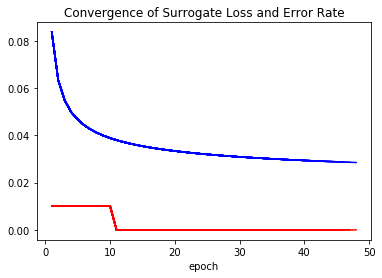

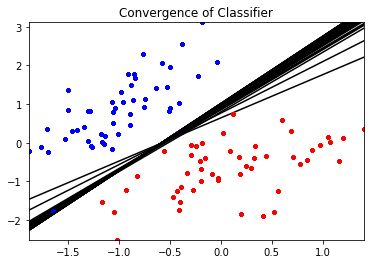

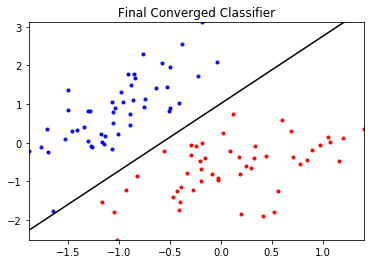

In [25]:
wts = np.array([0.5,1.,-0.25])
learner = logisticClassify2()
learner.theta = wts; # set the learner's parameters

learner.train(XA,YA,initStep=0.5)
print "Final Theta:", learner.theta

#### The plots of classifer on data set  B are:

Final Theta: [-0.75075015  1.71808938  0.15528256]


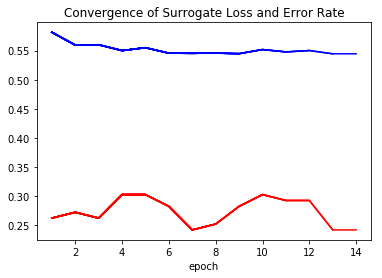

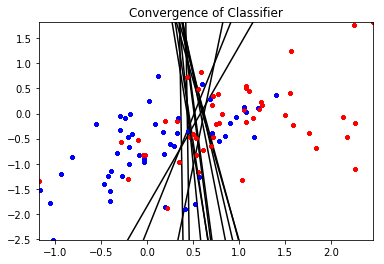

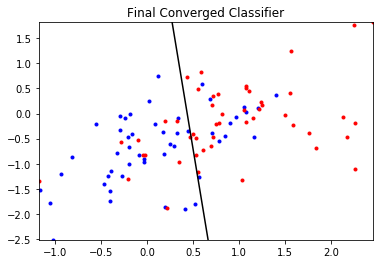

In [26]:
learner.train(XB,YB,initStep=0.5)
print "Final Theta:", learner.theta

## Question 8

The new gradient equations after adding the regularization term are:

$$
\frac{\partial J^{(j)}}{\partial \theta_0} = - y^{(j)} + \sigma(x^{(j)}\theta^T) + 2\alpha \theta_0
$$

$$
\frac{\partial J^{(j)}}{\partial \theta_1} = (- y^{(j)} + \sigma(x^{(j)}\theta^T))x_1 + 2\alpha \theta_1
$$

$$
\frac{\partial J^{(j)}}{\partial \theta_2} = (- y^{(j)} + \sigma(x^{(j)}\theta^T))x_2 + 2\alpha \theta_2
$$


Final Theta: [ 0.00930968  0.07858302 -0.10484828]


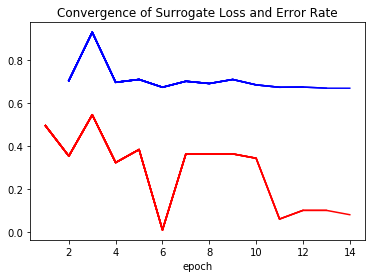

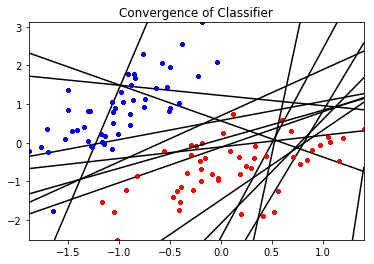

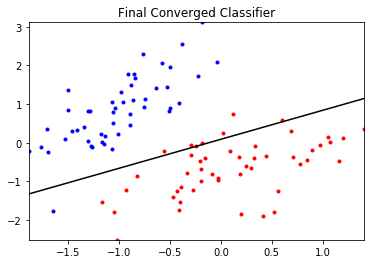

In [27]:
learner.train(XA,YA,alpha=2)
print "Final Theta:", learner.theta

Final Theta: [-0.00978878  0.05655184  0.04317285]


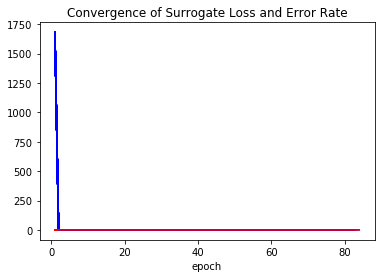

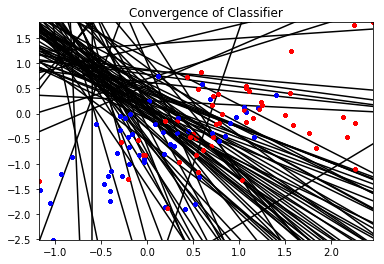

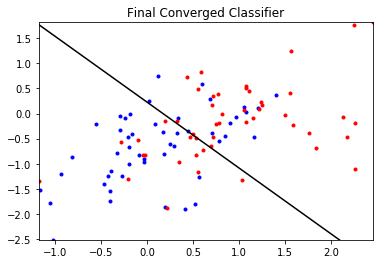

In [28]:
learner.train(XB,YB,alpha=2)
print "Final Theta:", learner.theta

# Problem 2: Shattering and VC Dimension

(1). $T( a + bx_1)$\
\newline
The classifer would be a straight line perpendicular to the x1 axis, which is a one-dimensional line. So the VC dim = 2, only (a)(b) can be shattered by the learner.


(2). $T((a*b)x_1 + (c/a)x_2)$\
\newline
This is a 2-dimensional line across the original point, so it does not have a constant term. In this case, the VC dim =2, only (a)(b) can be shattered by the learner.

(3). $T((x_1 -a)^2 + (x_2 - b)^2 + c)$\
\newline
The classifer is a circle with changing center and radius. VC dim = 3, (a)(b)(c) can be shattered by the learner.

(4). $T(a + bx_1 + cx_2) \times T(d + bx_1 + cx_2)$\
\newline
The classifer is two parallel lines distinguishing what's in between from outside. VC dim $\geqslant$ 4, (a)(b)(c)(d) can be shattered by the learner.

# Statement of Collaboration

I have abided by the rules of conduct and academic honesty adoped by UC Irvine. I did not discuss the specific solutions to this homework with any person.\
\newline
Chenxi Wang\
\newline
10/31/2017